## Task_2: Color Identification in Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Access spesific path on my Drive
%cd /content/drive/MyDrive/Intern_Task
# !pip install opendatasets

/content/drive/.shortcut-targets-by-id/18YpFLulPL1OQ3MnDFrGxgm4qO4tTQQ03/Yolo Project


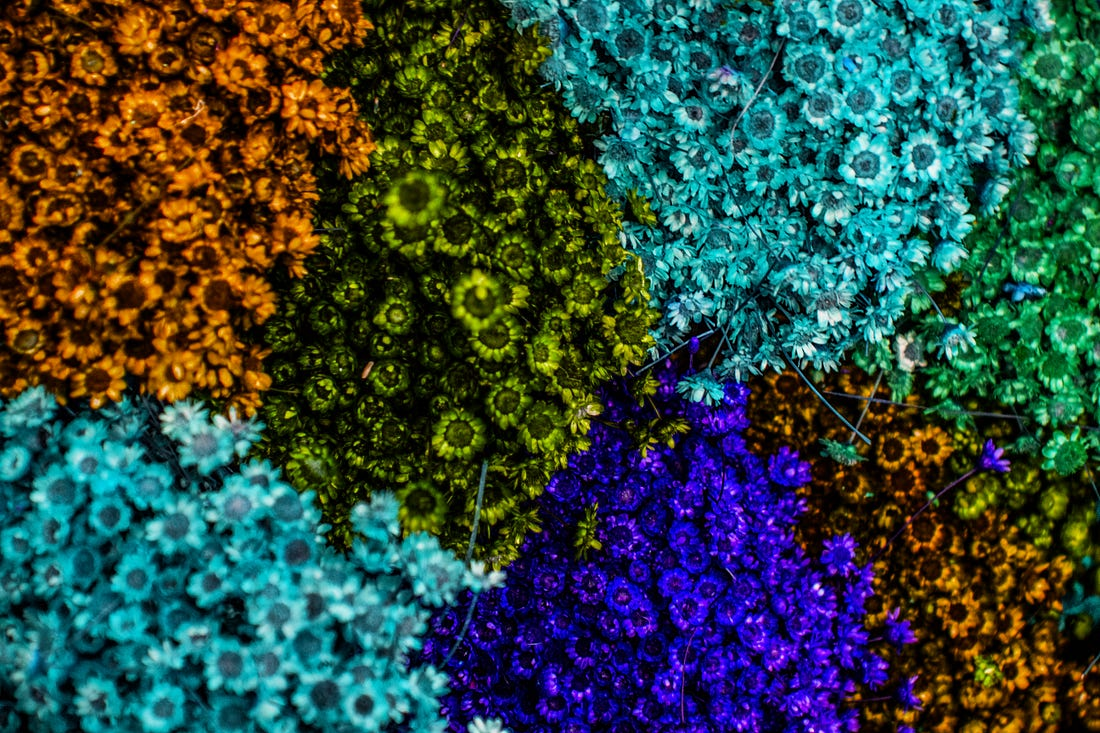

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


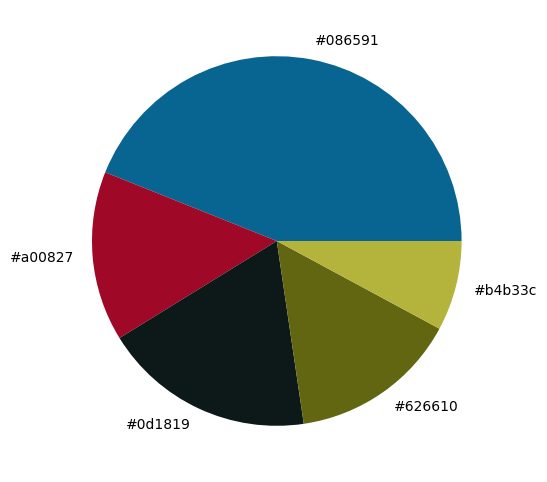

RGB: (red: 8.480330216497208, green: 101.65734422822877, blue: 145.84954932189325)
RGB: (red: 160.36626212306226, green: 8.480364619228894, blue: 39.712385394029866)
RGB: (red: 13.350695399031501, green: 24.924885522267623, blue: 25.23352515667615)
RGB: (red: 98.12890809643093, green: 102.92842190559531, blue: 16.51752312783741)
RGB: (red: 180.5664944400686, green: 179.01347860276343, blue: 60.298129843869084)


In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def color_detection(image_path, number_of_colors, show_chart=True):
    image = get_image(image_path)
    cv2_imshow(image)
    modified_image = cv2.resize(image, (600, 400), interpolation=cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    clf = KMeans(n_clusters=number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if show_chart:
        plt.figure(figsize=(8, 6))
        plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)

    return rgb_colors

# Example usage
image_path = "/content/drive/MyDrive/Intern_Task/color.jpg"  # Replace with the actual path of your image

number_of_colors = 5  # Number of colors to detect

# Detect the colors in the image and display the chart
detected_colors = color_detection(image_path, number_of_colors)
plt.show()

# Print the RGB values of the detected colors
for color in detected_colors:
    r, g, b = color
    print(f"RGB: (red: {r}, green: {g}, blue: {b})")
